In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [167]:
from matplotlib.lines import Line2D 

In [169]:
pone_price = pd.DataFrame(pd.read_csv("data/Mobile-Price-Prediction-cleaned_data.csv"))
pone_price

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999
...,...,...,...,...,...,...,...,...
802,3.8,6.0,32.0,4.54,48,12.0,2800,1299
803,4.1,8.0,64.0,4.54,64,8.0,2500,1390
804,4.4,3.0,32.0,6.20,48,1.0,3800,9790
805,3.7,10.0,32.0,4.50,64,8.0,3500,799


In [171]:
pone_price.isna().sum()

Ratings          0
RAM              0
ROM              0
Mobile_Size      0
Primary_Cam      0
Selfi_Cam        0
Battery_Power    0
Price            0
dtype: int64

In [173]:
pone_price.dtypes

Ratings          float64
RAM              float64
ROM              float64
Mobile_Size      float64
Primary_Cam        int64
Selfi_Cam        float64
Battery_Power      int64
Price              int64
dtype: object

### Price range variation based on RAM and ROM

In [176]:
## lets add a color function for the prices column:

def color_grouping(price):
    if price>20000:
        return 'red'
    elif price>10000:
        return 'blue'
    else:
        return 'green'

pone_price['Color'] = pone_price["Price"].apply(color_grouping)

In [178]:
pone_price

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price,Color
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999,red
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999,blue
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000,blue
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999,blue
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999,blue
...,...,...,...,...,...,...,...,...,...
802,3.8,6.0,32.0,4.54,48,12.0,2800,1299,green
803,4.1,8.0,64.0,4.54,64,8.0,2500,1390,green
804,4.4,3.0,32.0,6.20,48,1.0,3800,9790,green
805,3.7,10.0,32.0,4.50,64,8.0,3500,799,green


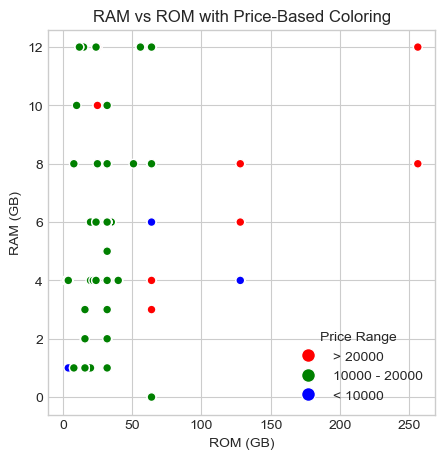

In [180]:
plt.style.use("seaborn-v0_8-whitegrid")
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(pone_price["ROM"], pone_price["RAM"], c=pone_price["Color"], s =40, edgecolors='w')

ax.set(ylabel="RAM (GB)", xlabel= "ROM (GB)", title="RAM vs ROM with Price-Based Coloring")

##legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='> 20000'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='10000 - 20000'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='< 10000')
]

plt.legend(handles=legend_elements, title='Price Range')




In [182]:
fig.savefig("graphs/ram_rom_price_variation.png")

### Price Range variation with Primary cam and Selfi cam performances

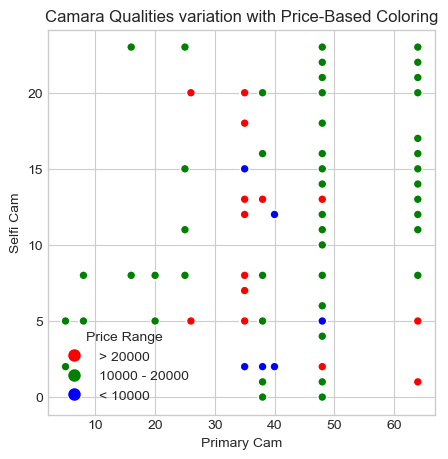

In [185]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(pone_price["Primary_Cam"], pone_price["Selfi_Cam"], c=pone_price["Color"], s =40, edgecolors='w')

ax.set(xlabel="Primary Cam", ylabel= "Selfi Cam", title="Camara Qualities variation with Price-Based Coloring")

##legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='> 20000'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='10000 - 20000'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='< 10000')
]

plt.legend(handles=legend_elements, title='Price Range')


In [186]:
fig.savefig("graphs/Camara_quality_variation.png")

### Price Range variation with RAM and Battery performance 

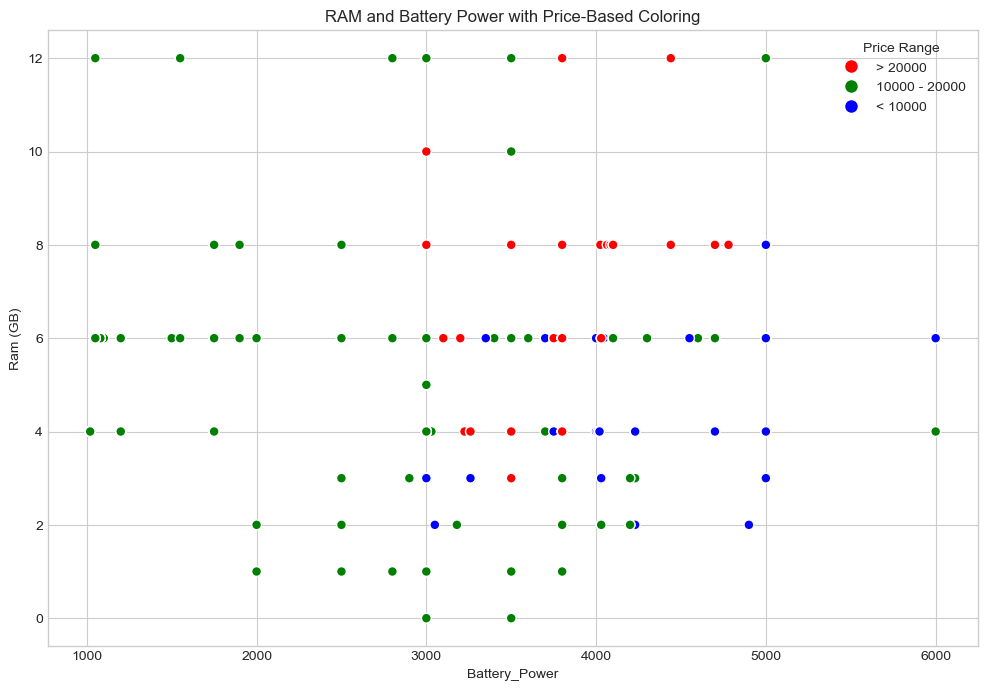

In [190]:
fig, ax = plt.subplots(figsize=(12,8))

ax.scatter(pone_price["Battery_Power"], pone_price["RAM"], c=pone_price["Color"], s =50, edgecolors='w')

ax.set(xlabel="Battery_Power", ylabel= "Ram (GB)", title="RAM and Battery Power with Price-Based Coloring")

##legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='> 20000'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='10000 - 20000'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='< 10000')
]

plt.legend(handles=legend_elements, title='Price Range')

In [191]:
fig.savefig("graphs/price_variation_with_battery_and_ram")

### Rating vs Price

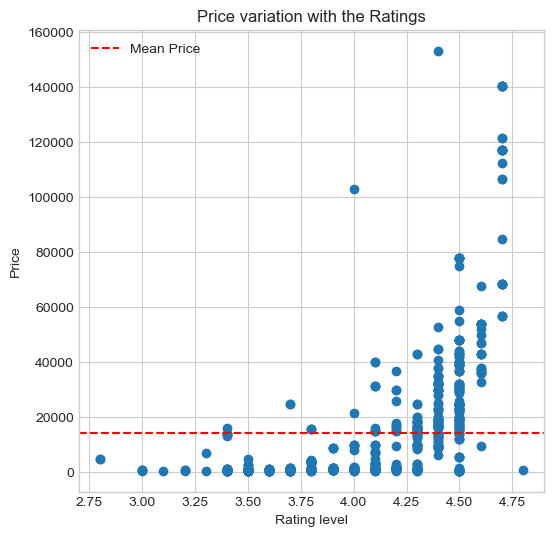

In [195]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(pone_price["Ratings"], pone_price["Price"])

ax.axhline(y = pone_price["Price"].mean(), linestyle = "--", color='red', label="Mean Price")
ax.set(xlabel="Rating level", ylabel="Price", title="Price variation with the Ratings")
ax.legend()

In [197]:
fig.savefig("graphs/price_variation_with_ratings")

### Lets create the model

In [200]:
pone_price.drop('Color', axis=1, inplace=True)
x = pone_price.drop("Price", axis=1)
y = pone_price["Price"]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [215]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model_1 = RandomForestRegressor();
model_1.fit(x_train, y_train)
model_1.score(x_test, y_test)

0.7802008505534505

#### Evaluation of the mode

#### R2 score:

In [224]:
y_pred = model_1.predict(x_test)

from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7802008505534505

#### Mean Absolute Error MAE: 

In [229]:
from sklearn.metrics import mean_absolute_error
mae_model_1 = mean_absolute_error(y_test, y_pred)
mae_model_1

2619.5691359764896

#### Mean Squared Error MSE:

In [232]:
from sklearn.metrics import mean_squared_error
mse_model_1 = mean_squared_error(y_test, y_pred)
mse_model_1

99632956.58962642

#### Scoring with cross validation 

In [237]:
from sklearn.model_selection import cross_val_score
np.random.seed(42)

cv_score = cross_val_score(model_1, x,y, cv=5).mean()
print(f"Cross validated accuracy of model_1 : {cv_score*100:.2f}%")

Cross validated accuracy of model_1 : 89.42%


In [248]:
cv_r2_score = cross_val_score(model_1, x,y, cv=5, scoring='r2').mean()
print(f"Cross validated r2 score of model_1 : {cv_r2_score*100:.2f}%")

Cross validated r2 score of model_1 : 89.76%


In [254]:
cv_mae = cross_val_score(model_1, x, y, cv=5, scoring='neg_mean_absolute_error').mean()
print(f"Cross validated MAE of model_1 : {cv_mae}")

Cross validated MAE of model_1 : -2207.8161009371647


In [256]:
cv_mse = cross_val_score(model_1, x, y, cv=5, scoring='neg_mean_squared_error').mean()
print(f"Cross validated MSE of model_1 : {cv_mse}")

Cross validated MSE of model_1 : -61091900.762728274
